In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
year_min = 2012
year_max = 2020
columns = ["REPORT_ID", "Year", "Month", "Day", "Time", "ACCLOC_X", "ACCLOC_Y"]
result = None
for y in range(year_min, year_max + 1):
    df = (pd.read_csv('data/{}_DATA_SA_Crash.csv'.format(y)))[columns]
    if (result is None): 
        result = df
    else:
        result = result.append(df, ignore_index=True)
# Drop rows with NaNs and write the output to a CSV file.
result = result.dropna()
result.to_csv('data/crash_data.csv', index=False)

In [2]:
df = pd.read_csv('data/crash_data.csv')
df.head()

,REPORT_ID,Year,Month,Day,Time,ACCLOC_X,ACCLOC_Y
0,2012-1-27/05/2021,2012,January,Sunday,04:30 pm,1330659.71,1671795.87
1,2012-2-27/05/2021,2012,January,Sunday,09:10 am,1329400.16,1668462.66
2,2012-3-27/05/2021,2012,January,Wednesday,11:30 am,1313748.22,1624241.28
3,2012-4-27/05/2021,2012,January,Wednesday,10:20 am,1325326.77,1672425.55
4,2012-5-27/05/2021,2012,January,Wednesday,03:30 pm,1326056.45,1673028.42


In [3]:
xmin, ymin, xmax, ymax = np.min(df['ACCLOC_X']), np.min(df['ACCLOC_Y']), np.max(df['ACCLOC_X']), np.max(df['ACCLOC_Y'])
print('xmin = {}\nymin = {}\nxmax = {}\nymax = {}\n'.format(xmin, ymin, xmax, ymax))

xmin = 412237.37
ymin = 1314984.56
xmax = 1565697.23
ymax = 2660165.5



Example of a query: find all accidents whose position $(x, y)$ is in the range $500000 \leq x \leq 600000 \wedge 2000000 \leq y \leq 2100000$.

In [4]:
result = df[(df.ACCLOC_X >= 500000) & (df.ACCLOC_X <= 600000) & (df.ACCLOC_Y >= 2000000) & (df.ACCLOC_Y <= 2100000)]
print('N. of records: {}'.format(len(result)))
result

N. of records: 18


,REPORT_ID,Year,Month,Day,Time,ACCLOC_X,ACCLOC_Y
5352,2012-6232-27/05/2021,2012,April,Thursday,01:30 pm,519828.80,2035730.93
26623,2013-7448-27/05/2021,2013,June,Wednesday,04:15 pm,560303.08,2037506.73
47760,2014-12075-27/05/2021,2014,August,Saturday,04:30 pm,580712.99,2040895.29
49461,2014-13784-27/05/2021,2014,November,Tuesday,05:30 pm,535640.18,2037085.23
59760,2015-7930-27/05/2021,2015,July,Wednesday,01:30 am,589809.19,2042645.41
74204,2016-6959-27/05/2021,2016,April,Wednesday,10:00 pm,516709.65,2035448.06
86431,2017-2426-27/05/2021,2017,March,Friday,03:00 pm,521542.93,2035885.25
86702,2017-2697-27/05/2021,2017,March,Saturday,10:20 am,510147.26,2033604.32
93146,2017-9143-27/05/2021,2017,September,Friday,08:00 pm,577669.60,2040675.26
104540,2018-7301-27/05/2021,2018,July,Wednesday,04:00 pm,524981.75,2036194.99


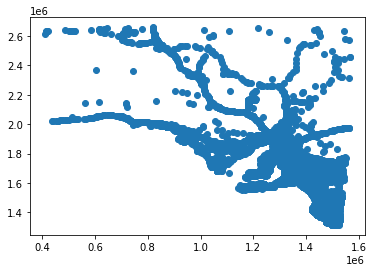

In [6]:
x, y = df['ACCLOC_X'], df['ACCLOC_Y']
plt.scatter(x, y)